Resize and pad images to unify their resolutions

In [1]:
import cv2
import os
import tqdm
import numpy as np
from matplotlib import pyplot as plt
croppedHandPhotosFolder = "leapCropped"
fileNames = [file for file in 
os.listdir(f"../train/photoRaw/{croppedHandPhotosFolder}") if os.path.isfile(os.path.join(f"../train/photoRaw/{croppedHandPhotosFolder}", file))]
jointPhotosFolders = ["leapJoints", "mpPhotos"]

In [2]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [3]:
def padImageToSize(oldImg, newHeight, newWidth, fillVal=0, isGrayscale=True):
    if isGrayscale:
        oldHeight, oldWidth = oldImg.shape
        result = np.full((newHeight, newWidth), fillVal, dtype=np.uint8)
    else:
        oldHeight, oldWidth, oldDepth = oldImg.shape
        result = np.full((newHeight, newWidth, oldDepth), fillVal, dtype=np.uint8)

    xCenter = (newWidth - oldWidth) // 2
    yCenter = (newHeight - oldHeight) // 2

    result[yCenter: yCenter + oldHeight, xCenter:xCenter + oldWidth] = oldImg

    return result

In [4]:
def getSizes(path):
    widths = []
    heights = []
    for fileName in tqdm.tqdm(fileNames):
        readPath = f"{path}/{croppedHandPhotosFolder}/{fileName}"
        im = cv2.imread(readPath)
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        h, w = gray.shape
        widths.append(w)
        heights.append(h)


        maxWidth = max(widths)
        maxHeight = max(heights)
    print(f"max width: {maxWidth}, max height: {maxHeight}")
    return widths,heights

In [16]:
def resizeImages(readFolderPath, writeFolderPath, height = None, width=None):
    for fileName in tqdm.tqdm(fileNames):
        readPath=readPath = f"{readFolderPath}/{croppedHandPhotosFolder}/{fileName}"
        writePath = f"{writeFolderPath}/{croppedHandPhotosFolder}/{fileName}"
        im = cv2.imread(readPath)
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        grayres = image_resize(gray, height=height, width=width)
        cv2.imwrite(writePath, grayres) # Save the image

        for folder in jointPhotosFolders:
            readPath = f"{readFolderPath}/{folder}/{fileName}"
            writePath = f"{writeFolderPath}/{folder}/{fileName}"
            im = cv2.imread(readPath)
            imres = image_resize(im, height=height, width=width)
            cv2.imwrite(writePath, imres)

In [24]:
def padImages(readFolderPath, writeFolderPath, height = None, width=None):
    for fileName in tqdm.tqdm(fileNames):
        readPath=readPath = f"{readFolderPath}/{croppedHandPhotosFolder}/{fileName}"
        writePath = f"{writeFolderPath}/{croppedHandPhotosFolder}/{fileName}"
        im = cv2.imread(readPath)
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        resizeVal = 0
        if height is not None:
            resizeVal = height
        else:
            resizeVal = width
        grayres = padImageToSize(gray, resizeVal, resizeVal, isGrayscale=True)
        cv2.imwrite(writePath, grayres) # Save the image

        for folder in jointPhotosFolders:
            readPath = f"{readFolderPath}/{folder}/{fileName}"
            writePath = f"{writeFolderPath}/{folder}/{fileName}"
            im = cv2.imread(readPath)
            imres = padImageToSize(im, resizeVal, resizeVal, isGrayscale=False)
            cv2.imwrite(writePath, imres)

In [29]:
def callPadWithBiggerValue(widths, heights, readFolderPath, writeFolderPath):
    maxWidth = max(widths)
    maxHeight = max(heights)
    if maxWidth>maxHeight:
        padImages(readFolderPath, writeFolderPath,width=maxWidth)
    else:
        padImages(readFolderPath, writeFolderPath,height=maxHeight)

In [32]:
#1. read min and max sizes from original images
origWidths, origHeights = getSizes("../train/photoRaw")
print("orig min height", min(origHeights))

#2. resize images to fit chosen rules
resizeImages("../train/photoRaw", "../train/photoPadded/minHeight", min(origHeights))
resizeImages("../train/photoRaw", "../train/photoPadded/maxHeight", max(origHeights))

#3. get sizes of new images
minsizeWidths, minsizeHeights = getSizes("../train/photoPadded/minHeight")
maxsizeWidths, maxsizeHeights = getSizes("../train/photoPadded/maxHeight")

#4. pad images to even out the images
callPadWithBiggerValue(minsizeWidths, minsizeHeights, "../train/photoPadded/minHeight", "../train/photoPadded/minHeight")
callPadWithBiggerValue(maxsizeWidths, maxsizeHeights, "../train/photoPadded/maxHeight", "../train/photoPadded/maxHeight")

  1%|          | 146/22000 [00:00<00:15, 1456.65it/s]

max width: 144, max height: 171
orig min height 64


  3%|▎         | 572/22000 [00:00<00:03, 5718.31it/s]

max width: 102, max height: 64


  1%|          | 113/22000 [00:00<00:19, 1129.30it/s]

max width: 273, max height: 171


100%|██████████| 22000/22000 [01:11<00:00, 308.35it/s]


In [33]:
#1. read min and max sizes from original images
origWidths, origHeights = getSizes("../train/photoRaw")
print("orig min width", min(origWidths))

#2. resize images to fit chosen rules
resizeImages("../train/photoRaw", "../train/photoPadded/minWidth", None, min(origWidths))
resizeImages("../train/photoRaw", "../train/photoPadded/maxWidth", None, max(origWidths))

#3. get sizes of new images
minsizeWidths, minsizeHeights = getSizes("../train/photoPadded/minWidth")
maxsizeWidths, maxsizeHeights = getSizes("../train/photoPadded/maxWidth")

#4. pad images to even out the images
callPadWithBiggerValue(minsizeWidths, minsizeHeights, "../train/photoPadded/minWidth", "../train/photoPadded/minWidth")
callPadWithBiggerValue(maxsizeWidths, maxsizeHeights, "../train/photoPadded/maxWidth", "../train/photoPadded/maxWidth")

  1%|          | 129/22000 [00:00<00:17, 1283.13it/s]

max width: 144, max height: 171
orig min width 63


  3%|▎         | 567/22000 [00:00<00:03, 5666.97it/s]

max width: 63, max height: 113


  0%|          | 87/22000 [00:00<00:25, 868.93it/s]

max width: 144, max height: 259


100%|██████████| 22000/22000 [01:11<00:00, 308.99it/s]


In [48]:
!eog ../train/photoPadded/maxHeight/leapCropped/A-2.jpeg

In [100]:
gr = cv2.cvtColor(cv2.imread("minsizeTrain/leapCropped/B-212.jpeg"), cv2.COLOR_BGR2GRAY)

In [101]:
gr = padImageToSize(gr, max(widths), max(widths), isGrayscale=True)

In [102]:
gr.shape

(64, 64)

In [58]:
min(widths)

63

In [78]:
min(heights)

40

In [56]:
len([i for i in range(len(widths)) if widths[i] > heights[i]])

2936

In [23]:
widths.index(max(widths))

6631

In [26]:
fileNames[6631]

'B-702.jpeg'

In [39]:
maxWidth

144

In [51]:
im = cv2.imread(f"train/leapCropped/{fileNames[8]}")
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
grayres= image_resize(gray, height=maxHeight)

In [52]:
grayres.shape

(171, 205)

In [53]:
gray.shape

(80, 96)

In [ ]:
im=cv2.imread("train/leapCropped/B-2.jpeg")
gr = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
grayres = image_resize(gr, height=max(heights))

In [5]:
im=cv2.imread("train/leapCropped/B-2.jpeg")
gr = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [6]:
gr.shape

(96, 79)

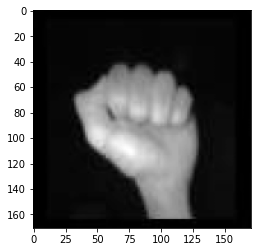

In [46]:
plt.imshow(grayres, cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
grayres = image_resize(gr, height=max(heights))

In [11]:
grayres.shape

(144, 118)

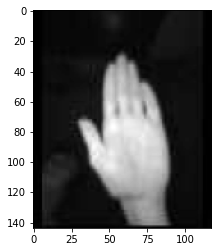

In [12]:
plt.imshow(grayres, cmap=plt.get_cmap('gray'))
plt.show()